## **RESEARCH INTEREST**

 The term Fortune 500 refers to a list of 500 of the largest companies compiled by Fortune magazine every year. Companies are ranked by their annual revenues for their respective fiscal years. This list includes both public and private companies using publicly available revenue data. A job with a Fortune 500 employer is a different world from most other employers. Usually, Company names are very well known, across many states or even the globe. That can be very good for one's career. Some of these companies are so consistent with their annual revenues that they understand that their workforce is a key to their success. Many of the Fortune 500 are included on the CNN Money’s list of 100 best companies to work for.

### ***PROJECT***

In this project we will see the graphical representation of Fortune 500 all over the world with respect there revenues, profits, number of employees in each organization. We will also plot the headquarters of each company.

**Data Source:** Utilizing data from someka website which has the CSV file with the Rank, Revenues, Revenue Change, Profits, Profit Change, Assets,Number of Employees of the Fortune 500 companies

**Datalink:** https://fortune.com/analytics

In [96]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import folium
import plotly.express as px

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [97]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [98]:
from shapely.geometry import Point

### ***Geographic map of the world boundaries***
We will import the shape file from internet and plot a world shape file.

In [99]:
! wget -q -O world-administrative-boundaries.zip https://docs.google.com/uc?id=1Nhciw6gPCoA6L98N4Kw0fKNT-Caf4e8_&export=download

zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
world_boundaries=gpd.read_file('world-administrative-boundaries.shp') #load the shapefile with gpd as world_boundaries

checking the data types of the world boundaries

In [100]:
world_boundaries.dtypes

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [101]:
world_boundaries.columns #displaying the columns of the world boundaries dataframe

Index(['iso3', 'status', 'color_code', 'name', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

<Axes: >

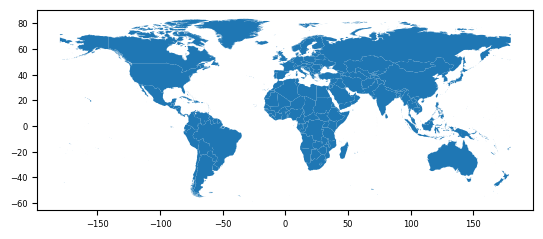

In [102]:
world_boundaries.plot() #ploting the world map

***Importing data of fortune 500 companies all over the world***

Here we import the fortune 500 companies data from the someka website which has the CSV file with the Rank, Revenues, Revenue Change, Profits, Profit Change, Assets,Number of Employees. We are importing this file from GitHub using `!wget`.

In [103]:
! wget -q -O Fortune-500.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/KazaGeetanjali-GISAssignments/Fortune-500.csv

Fortune_500_Dataset = pd.read_csv("Fortune-500.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
Fortune_500_Dataset.head() #Displaying rows

,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues ($millions),Revenue Change,Profits ($millions),Profit Change,Assets ($millions)
0,1,Walmart,U.S.,2100000,1,611289,0.067,11680,-0.146,243197
1,2,Saudi Aramco,Saudi Arabia,70496,6,603651,0.508,159069,0.51,663541
2,3,State Grid,China,870287,3,530009,0.151,8192,0.148,710763
3,4,Amazon,U.S.,1541000,2,513983,0.094,-2722,-1.082,462675
4,5,China National Petroleum,China,1087049,4,483019,0.173,21080,1.187,637223


In [104]:
Fortune_500_Dataset.columns #displaying the columns before the merge

Index(['Rank', 'Company Name', 'Country', 'Number of Employees',
       'Previous Rank', 'Revenues ($millions)', 'Revenue Change',
       'Profits ($millions)', 'Profit Change', 'Assets ($millions)'],
      dtype='object')

## **Changing both DataFrames to create Join/Merge**

To create a merge we change the country names to upper case and remove any leading or tailing spaces, replace specail charaters if present.

We also change the column name so that both dataframes have the same column names for country.

We also change the value for country column so that both dataframes are inline with each other

In [105]:
world_boundaries['name'] = world_boundaries['name'].str.upper().str.replace(' ', '').str.replace('.', '') #making the column data similar to the other data to merge on this column
Fortune_500_Dataset['Country'] = Fortune_500_Dataset['Country'].str.upper().str.replace(' ', '').str.replace('.', '') #turning the column data to upper case and replacing special charaters with no space

<ipython-input-105-1ca8c91f9b58>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-105-1ca8c91f9b58>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [106]:
world_boundaries = world_boundaries.rename(columns = {'name':'Country'}) #replacing the column name to create merge
world_boundaries.columns #printing the column names after renaming

Index(['iso3', 'status', 'color_code', 'Country', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

In [107]:
world_boundaries['Country'] = world_boundaries['Country'].replace('UKOFGREATBRITAINANDNORTHERNIRELAND','BRITAIN').replace('REPUBLICOFKOREA','SOUTHKOREA').replace('RUSSIANFEDERATION','RUSSIA')  #replacing the column values to create merge
print(world_boundaries.Country.to_string(index=False))

               NORTHERNMARIANAISLANDS
                         KURILISLANDS
                               FRANCE
                               SERBIA
                              URUGUAY
                                 GUAM
                               PANAMA
                  NETHERLANDSANTILLES
                              ALGERIA
                                 TOGO
                       MA'TANAL-SARRA
                          SWITZERLAND
                               JERSEY
                              AUSTRIA
                             PORTUGAL
                           LUXEMBOURG
                           KAZAKHSTAN
                                ARUBA
                              HOLYSEE
                     EQUATORIALGUINEA
                              JAMAICA
                              ESTONIA
                                NIGER
                               BELIZE
                              MOROCCO
                                MALTA
            

In [108]:
Fortune_500_Dataset['Country'] = Fortune_500_Dataset['Country'].replace('US','UNITEDSTATESOFAMERICA') #replacing the column values to create merge
print(Fortune_500_Dataset.Country.to_string(index=False)) #printing the column values after changing

UNITEDSTATESOFAMERICA
          SAUDIARABIA
                CHINA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
            SINGAPORE
                CHINA
UNITEDSTATESOFAMERICA
              GERMANY
              GERMANY
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                JAPAN
               FRANCE
          SWITZERLAND
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
           SOUTHKOREA
UNITEDSTATESOFAMERICA
               TAIWAN
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
          NETHERLANDS
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
               RUSSIA
                CHINA
                CHINA
                CHINA
                JAPAN
UNITEDSTAT

***Inner/Outer Merge***
Joining two data frames on the country column

*Inner Join:* An Inner Join returns only the matching rows between the two tables based on a specified condition.

*Outer Join:* An Outer Join returns all the rows from one table and matching rows from the other table based on a specified condition.

*Left Join:* All the records from the first Dataframe will be displayed, irrespective of whether the keys in the first Dataframe can be found in the second Dataframe

*Right Join:* All the records from the second Dataframe will be displayed.


In [109]:
Fortune_inner_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'inner', indicator = True) #inner join based on country column

Fortune_outer_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'outer', indicator = True)  #outer join based on country column

Fortune_right_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'right', indicator = True)  #right join based on country column

Fortune_left_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'left', indicator = True)  #left join based on country column

Fortune_inner_join[['Company Name','Country','Revenues ($millions)']]

,Company Name,Country,Revenues ($millions)
0,TotalEnergies,FRANCE,263310
1,Electricité de France,FRANCE,150902
2,Engie,FRANCE,109175
3,AXA,FRANCE,109067
4,Carrefour,FRANCE,90062
...,...,...,...
495,Xinjiang Guanghui Industry Investment,CHINA,30922
496,Petronas,MALAYSIA,85365
497,Volvo,SWEDEN,46828
498,BHP Group,AUSTRALIA,71502


In [110]:
Fortune_inner_join_csv = pd.DataFrame(Fortune_inner_join)

# Save the dataframe to a CSV file
Fortune_inner_join_csv.to_csv('Fortune_inner_join.csv', index=False)

In [111]:
# computing number of rows
row_inner = len(Fortune_inner_join.axes[0])

# computing number of columns
cols_inner = len(Fortune_inner_join.axes[1])

print("Number of Rows: ", row_inner)
print("Number of Columns: ", cols_inner)

Number of Rows:  500
Number of Columns:  19


In [112]:
Fortune_inner_join.dtypes #checking the data types after the join

iso3                      object
status                    object
color_code                object
Country                   object
continent                 object
region                    object
iso_3166_1_               object
french_shor               object
geometry                geometry
Rank                       int64
Company Name              object
Number of Employees        int64
Previous Rank             object
Revenues ($millions)       int64
Revenue Change            object
Profits ($millions)        int64
Profit Change             object
Assets ($millions)         int64
_merge                  category
dtype: object

<Axes: >

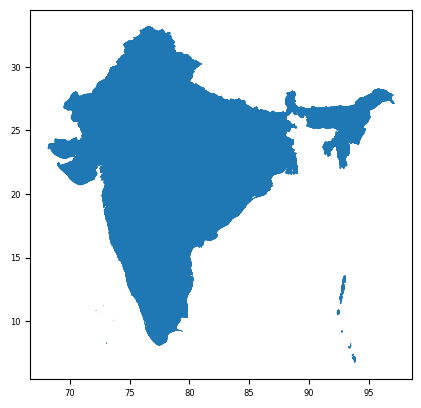

In [113]:
Fortune_inner_join.loc[Fortune_inner_join['Country']=="INDIA"].plot() #ploting an individual map after the merge

## **Ploting based on company revenues**
Revenues are as reported, including revenues from discontinued operations when published. If a spin-off is on the list, it has not been included in discontinued operations. Revenues for commercial banks includes interest and noninterest revenues. Revenues for insurance companies include premium and annuity income, investment income, and capital gains or losses, but exclude deposits. Revenue figures for all companies include consolidated subsidiaries and exclude excise taxes.

Ploting the map based on the revenue for each company in fortune 500 list

<Axes: >

[]

[]

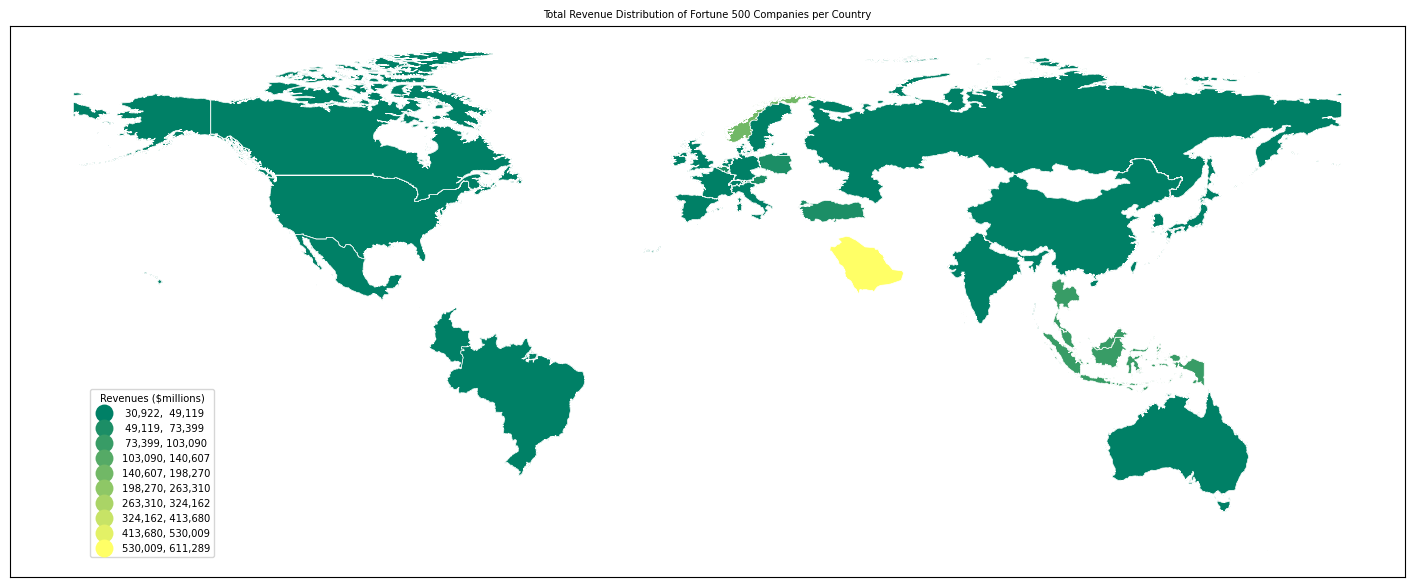

In [144]:
#ploting the inner join dataframe
fig, ax = plt.subplots(figsize=(18,12))  #sets the sze of the map
Fortune_inner_join.plot(ax=ax,
                        column='Revenues ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='summer', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.15, 0.35),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':'large'})  #customizing the legend

legend_details = ax.get_legend()
legend_details.set_title("Revenues ($millions)") #setting the tittle for the legend
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country") #setting the tittle for the map
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()


Ploting the map based on the outer merge to see the countries which are not having any fortune 500 companies

In [115]:
Fortune_outer_join._merge.value_counts() #counts the division of the merges

both          500
left_only     223
right_only      0
Name: _merge, dtype: int64

In [116]:
Fortune_outer_join.isnull().any() #checks for the fields which are not having any value(NaN) in there columns

iso3                     True
status                   True
color_code               True
Country                 False
continent               False
region                   True
iso_3166_1_              True
french_shor             False
geometry                False
Rank                     True
Company Name             True
Number of Employees      True
Previous Rank            True
Revenues ($millions)     True
Revenue Change           True
Profits ($millions)      True
Profit Change            True
Assets ($millions)       True
_merge                  False
dtype: bool

In [117]:
Fortune_outer_join.Country[Fortune_outer_join._merge!='both'] #checking if there is any problem to the values which did not merge

0                    NORTHERNMARIANAISLANDS
1                              KURILISLANDS
26                                   SERBIA
27                                  URUGUAY
28                                     GUAM
                       ...                 
718                            BOUVETISLAND
719    THEFORMERYUGOSLAVREPUBLICOFMACEDONIA
720                                    PERU
721                                   BENIN
722                                PARAGUAY
Name: Country, Length: 223, dtype: object

In [118]:
Fortune_outer_join_plot = Fortune_outer_join.fillna(value = 0) #after checking if there is no problem fill the column values with 0

In [119]:
Fortune_outer_join_profit = Fortune_outer_join_plot

In [120]:
Fortune_outer_join_plot[['Country', 'Revenues ($millions)', 'Profits ($millions)']]

,Country,Revenues ($millions),Profits ($millions)
0,NORTHERNMARIANAISLANDS,0.0,0.0
1,KURILISLANDS,0.0,0.0
2,FRANCE,263310.0,20526.0
3,FRANCE,150902.0,-18869.0
4,FRANCE,109175.0,227.0
...,...,...,...
718,BOUVETISLAND,0.0,0.0
719,THEFORMERYUGOSLAVREPUBLICOFMACEDONIA,0.0,0.0
720,PERU,0.0,0.0
721,BENIN,0.0,0.0


<Axes: >

[]

[]

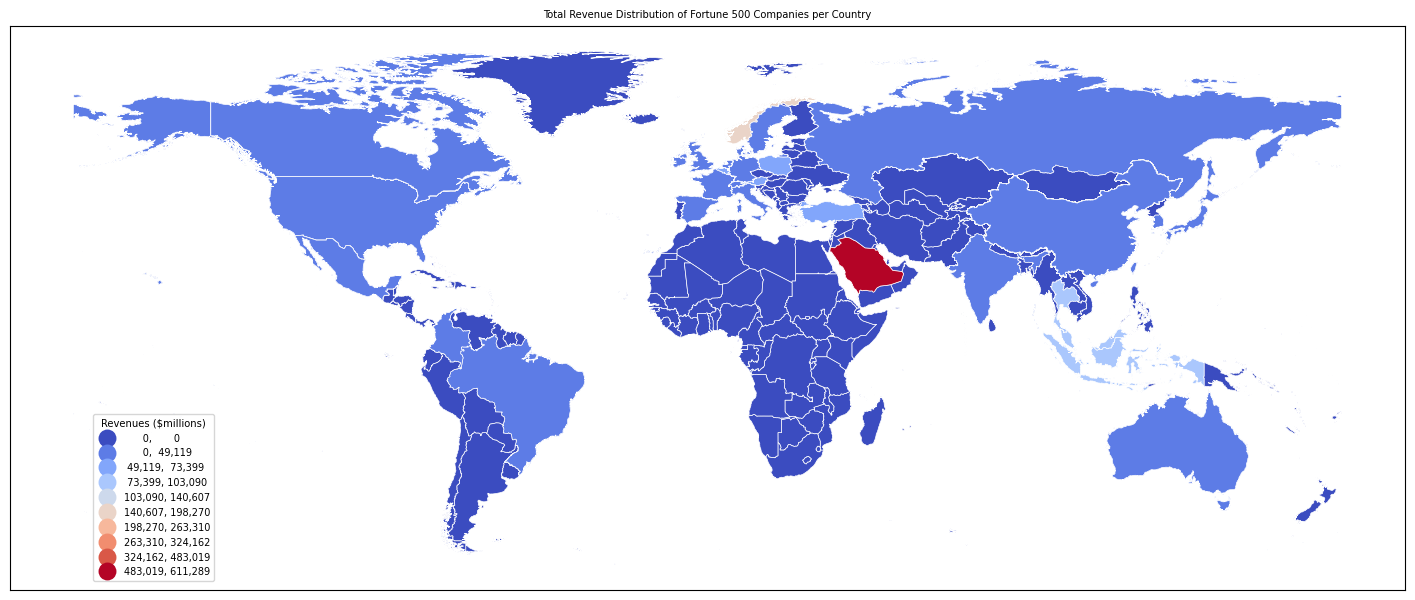

In [151]:
#ploting the outer join dataframe
fig, ax = plt.subplots(figsize=(18,12))  #sets the sze of the map
Fortune_outer_join_plot.plot(ax=ax,
                        column='Revenues ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='coolwarm', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.15, 0.32),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':7})  #customizing the legend

legend_details_outer = ax.get_legend()
legend_details_outer.set_title("Revenues ($millions)") #setting the tittle for the legend
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country") #setting the tittle for the map
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()

## ***Subploting (ploting 2 maps side by side)***

*Revenues*

Revenues are as reported, including revenues from discontinued operations when published. If a spin-off is on the list, it has not been included in discontinued operations

*Profits*

Profits are shown after taxes, extraordinary credits or charges, cumulative effects of accounting changes, and noncontrolling interests (including subsidiary preferred dividends), but before preferred dividends of the company. Profits for real estate investment trusts, partnerships, and cooperatives are reported but are not comparable with those of the other companies on the list because they are not taxed on a comparable basis. Profits for mutual insurance companies are based on statutory accounting.

We will use the option of subploting to compare which country is making more revenue and profit by ploting them side by side

<Axes: >

[]

[]

<Axes: >

[]

[]

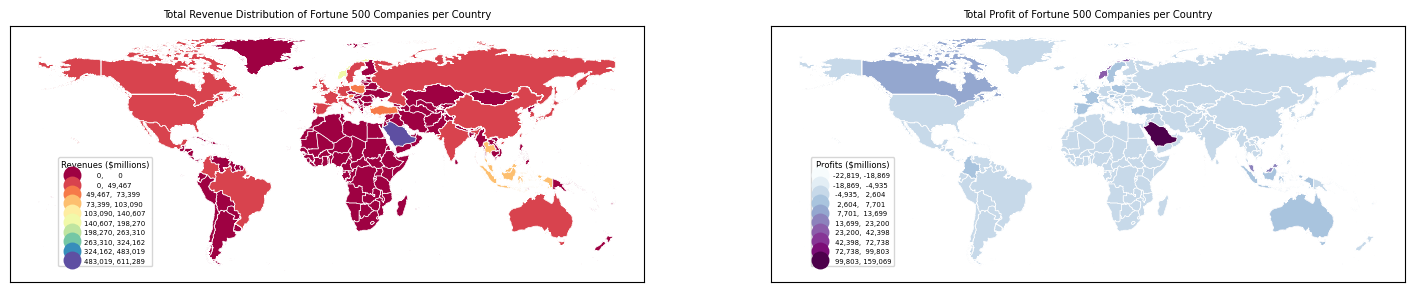

In [122]:
fig, (ax,ax1) = plt.subplots( 1, 2, figsize=(18,12))

#fig, ax1 = plt.subplots(figsize=(18,12))  #sets the sze of the map
#sets the sze of the map
Fortune_outer_join_plot.plot(ax=ax,
                        column='Revenues ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='Spectral', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.23, 0.5),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'medium',
                        'fontsize':'small'})  #customizing the legend

legend_details_outer = ax.get_legend()
legend_details_outer.set_title("Revenues ($millions)") #setting the tittle for the legend
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country") #setting the tittle for the map
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.show()

Fortune_outer_join_profit.plot(ax=ax1,
                        column='Profits ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='BuPu', #setting the colors to the division
                        scheme='natural_breaks', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (0.2, 0.5),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'medium',
                        'fontsize':'small'})  #customizing the legend

legend_details_outer_profit = ax1.get_legend()
legend_details_outer_profit.set_title("Profits ($millions)") #setting the tittle for the legend
ax1.title.set_text("Total Profit of Fortune 500 Companies per Country") #setting the tittle for the map
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
#plt.show()

***Companies per country***

Counting how many companies are there for each country

Making a new dataframe with the countries and the count of companies per country

Merging the world boundaries and the count per country Ploting the map based on the number of companies for each country


In [123]:
country_List = Fortune_inner_join['Country']

# converting the list to a Series and counting the values
country_count = pd.Series(country_List).value_counts()
country_count

UNITEDSTATESOFAMERICA    136
CHINA                    135
JAPAN                     41
GERMANY                   30
FRANCE                    24
SOUTHKOREA                18
BRITAIN                   15
CANADA                    14
SWITZERLAND               11
NETHERLANDS               10
BRAZIL                     9
SPAIN                      8
INDIA                      8
TAIWAN                     7
ITALY                      5
DENMARK                    3
SINGAPORE                  3
IRELAND                    3
MEXICO                     3
RUSSIA                     3
AUSTRALIA                  2
SAUDIARABIA                1
NORWAY                     1
INDONESIA                  1
BELGIUM                    1
THAILAND                   1
TURKEY                     1
COLOMBIA                   1
LUXEMBOURG                 1
AUSTRIA                    1
MALAYSIA                   1
SWEDEN                     1
POLAND                     1
Name: Country, dtype: int64

In [124]:
country_count_df= country_count.to_frame(name='count_of_companies_country') #converting series to data frame
country_count_df['Country'] = country_count_df.index #changing the column name
country_count_df.columns

Index(['count_of_companies_country', 'Country'], dtype='object')

In [125]:
country_count_df #checking dataframe

,count_of_companies_country,Country
UNITEDSTATESOFAMERICA,136,UNITEDSTATESOFAMERICA
CHINA,135,CHINA
JAPAN,41,JAPAN
GERMANY,30,GERMANY
FRANCE,24,FRANCE
SOUTHKOREA,18,SOUTHKOREA
BRITAIN,15,BRITAIN
CANADA,14,CANADA
SWITZERLAND,11,SWITZERLAND
NETHERLANDS,10,NETHERLANDS


In [126]:
FortuneCount_inner_join = pd.merge(world_boundaries, country_count_df, on = 'Country', how = 'inner', indicator = False) #inner merge

FortuneCount_outer_join = pd.merge(world_boundaries, country_count_df, on = 'Country', how = 'outer', indicator = False) #outer merge

In [127]:
companies_Per_Country= FortuneCount_inner_join[['Country','count_of_companies_country']] #displaying data

ploting Number of Fortune 500 Companies Per Country

<Axes: >

[]

[]

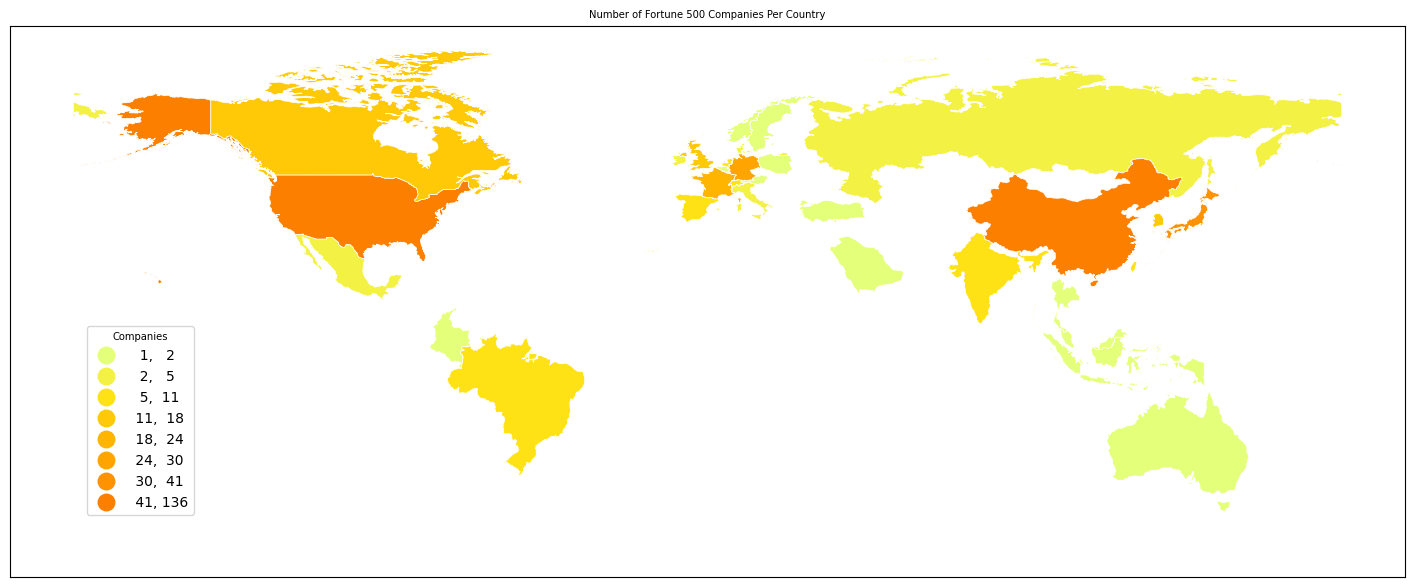

In [152]:
fig, ax = plt.subplots(figsize=(18,12))
FortuneCount_inner_join.plot(ax=ax,
                        column='count_of_companies_country',
                        legend=True,
                        cmap='Wistia',
                        scheme='natural_breaks',
                        k=8,
                        edgecolor='w',
                        linewidth=0.5,
                        legend_kwds= {'bbox_to_anchor': (0.05, 0.1),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':10,'loc':'lower left'})
leg1 = ax.get_legend()
leg1.set_title("Companies")
ax.title.set_text("Number of Fortune 500 Companies Per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()

## ***Company Headquaters Ploting***

Downloaded data of each company headquaters data of fortune 500 companies and
plotted circles based on number of employees

If circle is big that indicates that the number of employees in the company are high and if the circle is small which indicates that the employee are less in number

When you hower over the ploting we can see the data of the companies like rank,employees, website, county

data Link: https://hifld-geoplatform.opendata.arcgis.com/datasets/a4d813c396934fc09d0b801a0c491852/explore

In [129]:
! wget -q -O Fortune_500_Corporate_Headquarters.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/KazaGeetanjali-GISAssignments/Fortune_500_Corporate_Headquarters.csv

Fortune_500_Corporate_Address = pd.read_csv("Fortune_500_Corporate_Headquarters.csv", encoding='latin1') #reading datafile of headquater in form of CSV
Fortune_500_Corporate_Address.head()

,ï»¿X,Y,FID,OBJECTID,RANK,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,PRC,COUNTYFIPS,COMMENTS,WEBSITE,PROFIT,GlobalID,CreationDate,Creator,EditDate,Editor
0,-1.293321e+07,5.403709e+06,1,1,49,ALBERTSONS COS.,250 PARKCENTER BOULEVARD,NOT AVAILABLE,BOISE,ID,...,ADDRESS,16001,NOT AVAILABLE,HTTPS://WWW.ALBERTSONS.COM/#1,-502.2,{A7574C1C-884F-48A8-A612-51202F5036DF},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
1,-1.292942e+07,5.392879e+06,2,2,226,MICRON TECHNOLOGY,8000 SOUTH FEDERAL WAY,NOT AVAILABLE,BOISE,ID,...,ADDRESS,16001,NOT AVAILABLE,HTTPS://WWW.MICRON.COM/,-276.0,{3C4FFBAF-B76E-435E-9B5F-D93C995F5720},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
2,-8.842930e+06,4.313449e+06,3,3,290,LABORATORY CORP. OF AMERICA,358 SOUTH MAIN STREET,NOT AVAILABLE,BURLINGTON,NC,...,ADDRESS,37001,NOT AVAILABLE,HTTPS://WWW.LABCORP.COM/,732.1,{95021691-694A-4761-90C9-E5E1DE52DC1F},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
3,-1.357618e+07,4.507432e+06,4,4,440,LAM RESEARCH,4650 CUSHING PARKWAY,NOT AVAILABLE,FREMONT,CA,...,ADDRESS,6001,NOT AVAILABLE,HTTPS://WWW.LAMRESEARCH.COM/,914.0,{1C7A6B3E-5EB8-46D7-81B9-E1A6113187A2},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
4,-1.357871e+07,4.508509e+06,5,5,198,SYNNEX,44201 NOBEL DRIVE,NOT AVAILABLE,FREMONT,CA,...,ADDRESS,6001,NOT AVAILABLE,HTTPS://WWW.SYNNEXCORP.COM/,234.9,{D8F8FE15-E3C1-4848-8D28-141470CE17F5},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD


In [130]:
Fortune_500_Corporate_Address.dtypes #checking data types

ï»¿X            float64
Y               float64
FID               int64
OBJECTID          int64
RANK              int64
NAME             object
ADDRESS          object
ADDRESS2         object
CITY             object
STATE            object
ZIP               int64
COUNTY           object
EMPLOYEES         int64
REVENUES          int64
LATITUDE        float64
LONGITUDE       float64
SOURCE           object
PRC              object
COUNTYFIPS        int64
COMMENTS         object
WEBSITE          object
PROFIT          float64
GlobalID         object
CreationDate     object
Creator          object
EditDate         object
Editor           object
dtype: object

In [131]:
Fortune_500_Corporate_Address = Fortune_500_Corporate_Address.rename(columns = {'ï»¿X':'X'})

setting the values of longittude and latitude into variables to access the further

In [132]:
longi= Fortune_500_Corporate_Address['LONGITUDE']
lat = Fortune_500_Corporate_Address['LATITUDE']

Plotting circles on the map in the form of number of employees

big circle indicates huge number of employees

small circle indicates less number of employees

When hover over we can find addtional data related to the each companies

In [133]:
fig = px.scatter_mapbox(Fortune_500_Corporate_Address, #calling the data frame where the headquaters details are stored
                        lat="LATITUDE", #setting the latitude details
                        lon="LONGITUDE", #setting the longitude details
                        hover_name="NAME", #assigning the hover name
                        hover_data=["RANK","EMPLOYEES","WEBSITE","COUNTY"], #assigning addtional hover data
                        zoom=3,
                        height=600,
                        size= 'EMPLOYEES', #setting the attribute for ploting
                        opacity=0.8,
                        width=1300)
fig.update_layout(mapbox_style='stamen-terrain',title_text="Number of employees per Fortune 500 Company") #setting tittle for the map

## ***Plotting bar graph***

Plotting bar graph based number of employees working in headquaters per each state

In [134]:
Fortune_500_Total_EMPLOYEES = Fortune_500_Corporate_Address["EMPLOYEES"]
Fortune_500_NAME = Fortune_500_Corporate_Address["STATE"]
Fortune_500_RANK = Fortune_500_Corporate_Address["RANK"]

<BarContainer object of 500 artists>

Text(0.5, 1.0, 'Number of employees per each state')

Text(0.5, 0, 'Employees')

Text(0, 0.5, 'States')

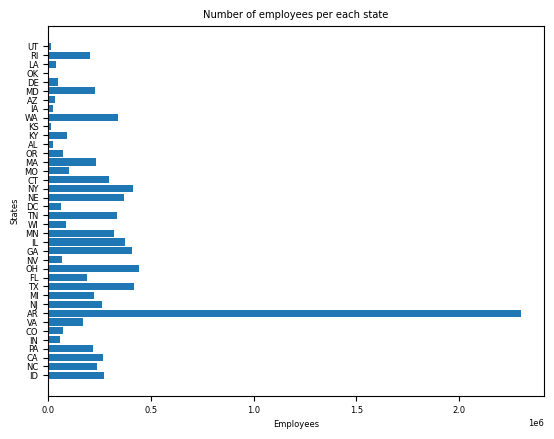

In [135]:
plt.rc('font', size=6) #setting the size of the map
plt.barh(Fortune_500_NAME,Fortune_500_Total_EMPLOYEES) #plotting a bar graph based on the state and the employees
plt.title("Number of employees per each state")
plt.xlabel("Employees")
plt.ylabel("States")

**Marking Headquaters on different types of maps**

Marking headquaters of fortune 500 companies on different kind of maps like Openstreet map, google maps, Google Satellite, Google Satellite Hybrid, Google Terrain, Stamenwatercolor maps

Customizing the differnet type of maps and then marking them on the map based on the company name column

In [136]:
mapObj= folium.Map(
    location=[35.6912809,-116.9880973],
    zoom_start=4)
folium.TileLayer('openstreetmap').add_to(mapObj) #customizing differnet kind of maps attributes
folium.TileLayer('stamenterrain', attr="stamenterrain").add_to(mapObj)
folium.TileLayer('stamenwatercolor', attr="stamenwatercolor").add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Maps').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Satellite').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Terrain').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Satellite Hybrid').add_to(mapObj)
for row in range(len(Fortune_500_Corporate_Address)):
  #top 100 companies will be in green color and have a heart icon
  if Fortune_500_Corporate_Address.loc[row, "RANK"] <=100:
    website="<h5>Check out website for more <a href=" +Fortune_500_Corporate_Address.loc[row, "WEBSITE"]+ " target='_blank'>here</a></h5>"
    folium.Marker(location=[Fortune_500_Corporate_Address.loc[row, "LATITUDE"], Fortune_500_Corporate_Address.loc[row, "LONGITUDE"]],
              icon=folium.Icon(icon='heart', prefix='fa', color='green'),
              popup=folium.Popup(website, max_width=500),
              tooltip= Fortune_500_Corporate_Address.loc[row, "NAME"]
              ).add_to(mapObj) #marking headquaters on the different kind of maps based on the name
  #top 100 - 300 companies will be in blue color and have a star icon
  elif Fortune_500_Corporate_Address.loc[row, "RANK"] <=300:
    folium.Marker(location=[Fortune_500_Corporate_Address.loc[row, "LATITUDE"], Fortune_500_Corporate_Address.loc[row, "LONGITUDE"]],
              icon=folium.Icon(icon='star', prefix='fa', color='blue'),
              popup=folium.Popup(website, max_width=500),
              tooltip= Fortune_500_Corporate_Address.loc[row, "NAME"]
              ).add_to(mapObj) #marking headquaters on the different kind of maps based on the name
  #top 300 - 500 companies will be in red color and have a check icon
  else:
    folium.Marker(location=[Fortune_500_Corporate_Address.loc[row, "LATITUDE"], Fortune_500_Corporate_Address.loc[row, "LONGITUDE"]],
              icon=folium.Icon(icon='check', prefix='fa', color='red'),
              popup=folium.Popup(website, max_width=500),
              tooltip= Fortune_500_Corporate_Address.loc[row, "NAME"]
              ).add_to(mapObj) #marking headquaters on the different kind of maps based on the name
folium.LayerControl().add_to(mapObj)
mapObj

Making a list containing longitude and latitude

In [137]:
list(zip(Fortune_500_Corporate_Address["LONGITUDE"],Fortune_500_Corporate_Address["LATITUDE"]))

[(-116.18099, 43.59974),
 (-116.14697, 43.52925),
 (-79.43739, 36.09317),
 (-121.95694, 37.4886),
 (-121.97965, 37.49628),
 (-121.89039, 37.71041),
 (-122.27237, 37.80348),
 (-80.2658, 40.50779),
 (-79.99485, 40.44136),
 (-80.00437, 40.43329),
 (-80.00051, 40.44129),
 (-80.00357, 40.43992),
 (-85.23743, 41.0411),
 (-104.89224, 39.60092),
 (-104.88214, 39.581553),
 (-104.86745, 39.5482),
 (-104.85536, 39.54506),
 (-104.84571, 39.55318),
 (-104.84571, 39.55318),
 (-104.84492, 39.54685),
 (-77.11261, 38.87985),
 (-77.07012, 38.89465),
 (-85.92326, 39.20402),
 (-94.21763, 36.36477),
 (-94.14745, 36.2453),
 (-74.1272, 40.89756),
 (-74.20762, 41.01613),
 (-74.17075, 41.07444),
 (-74.00657, 40.87398),
 (-86.44101, 42.14912),
 (-98.47939, 29.49244),
 (-98.42136, 29.624432),
 (-98.606, 29.58919),
 (-98.45941, 29.6161),
 (-98.573, 29.53455),
 (-80.63837, 28.0913),
 (-105.0992, 39.91172),
 (-105.14427, 39.9206),
 (-80.14419, 26.12002),
 (-74.80758, 40.09215),
 (-84.52325, 39.30823),
 (-84.42792, 

In [138]:
from shapely import geometry
points_geo= [Point(xy) for xy in zip(Fortune_500_Corporate_Address["LONGITUDE"],Fortune_500_Corporate_Address["LATITUDE"])] #making a point

In [139]:
Fortune_500_geo= gpd.GeoDataFrame(Fortune_500_Corporate_Address, crs={'init': 'epsg:4326'}, geometry=points_geo) #creating a new column with point column added in it
Fortune_500_geo

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,X,Y,FID,OBJECTID,RANK,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,COUNTYFIPS,COMMENTS,WEBSITE,PROFIT,GlobalID,CreationDate,Creator,EditDate,Editor,geometry
0,-1.293321e+07,5.403709e+06,1,1,49,ALBERTSONS COS.,250 PARKCENTER BOULEVARD,NOT AVAILABLE,BOISE,ID,...,16001,NOT AVAILABLE,HTTPS://WWW.ALBERTSONS.COM/#1,-502.2,{A7574C1C-884F-48A8-A612-51202F5036DF},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-116.18099 43.59974)
1,-1.292942e+07,5.392879e+06,2,2,226,MICRON TECHNOLOGY,8000 SOUTH FEDERAL WAY,NOT AVAILABLE,BOISE,ID,...,16001,NOT AVAILABLE,HTTPS://WWW.MICRON.COM/,-276.0,{3C4FFBAF-B76E-435E-9B5F-D93C995F5720},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-116.14697 43.52925)
2,-8.842930e+06,4.313449e+06,3,3,290,LABORATORY CORP. OF AMERICA,358 SOUTH MAIN STREET,NOT AVAILABLE,BURLINGTON,NC,...,37001,NOT AVAILABLE,HTTPS://WWW.LABCORP.COM/,732.1,{95021691-694A-4761-90C9-E5E1DE52DC1F},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-79.43739 36.09317)
3,-1.357618e+07,4.507432e+06,4,4,440,LAM RESEARCH,4650 CUSHING PARKWAY,NOT AVAILABLE,FREMONT,CA,...,6001,NOT AVAILABLE,HTTPS://WWW.LAMRESEARCH.COM/,914.0,{1C7A6B3E-5EB8-46D7-81B9-E1A6113187A2},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-121.95694 37.48860)
4,-1.357871e+07,4.508509e+06,5,5,198,SYNNEX,44201 NOBEL DRIVE,NOT AVAILABLE,FREMONT,CA,...,6001,NOT AVAILABLE,HTTPS://WWW.SYNNEXCORP.COM/,234.9,{D8F8FE15-E3C1-4848-8D28-141470CE17F5},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-121.97965 37.49628)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-9.784044e+06,5.206344e+06,496,496,111,ABBVIE,1 NORTH WAUKEGAN,NOT AVAILABLE,NORTH CHICAGO,IL,...,17097,NOT AVAILABLE,HTTPS://WWW.ABBVIE.COM/,5953.0,{8B0E310D-9586-4EBD-AAF8-76501AED4026},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-87.89156 42.30212)
496,-8.367717e+06,4.859359e+06,497,497,31,COMCAST,1701 JOHN F KENNEDY BOULEVARD,COMCAST CENTER,PHILADELPHIA,PA,...,42101,NOT AVAILABLE,HTTPS://CORPORATE.COMCAST.COM/,8695.0,{A860B365-3B9B-4F49-AA44-255962AA4DBE},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-75.16848 39.95468)
497,-9.407100e+06,4.736452e+06,498,498,36,PROCTER & GAMBLE,1 PROCTER AND GAMBLE PLAZA,NOT AVAILABLE,CINCINNATI,OH,...,39061,NOT AVAILABLE,HTTPS://US.PG.COM/,10508.0,{981D0B05-CE5A-415F-A89C-4CD9949BE423},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-84.50542 39.10311)
498,-1.038271e+07,5.617628e+06,499,499,239,AMERIPRISE FINANCIAL,55 AMERIPRISE FINANCIAL CENTER,AMERIPRISE FINANCIAL CENTER,MINNEAPOLIS,MN,...,27053,NOT AVAILABLE,HTTPS://WWW.AMERIPRISE.COM/,1314.0,{58D4BFB3-4EA4-4556-BD31-C084A10D655F},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-93.26949 44.97526)


Ploting the headquaters in the map

<Axes: >

<Axes: >

[]

[]

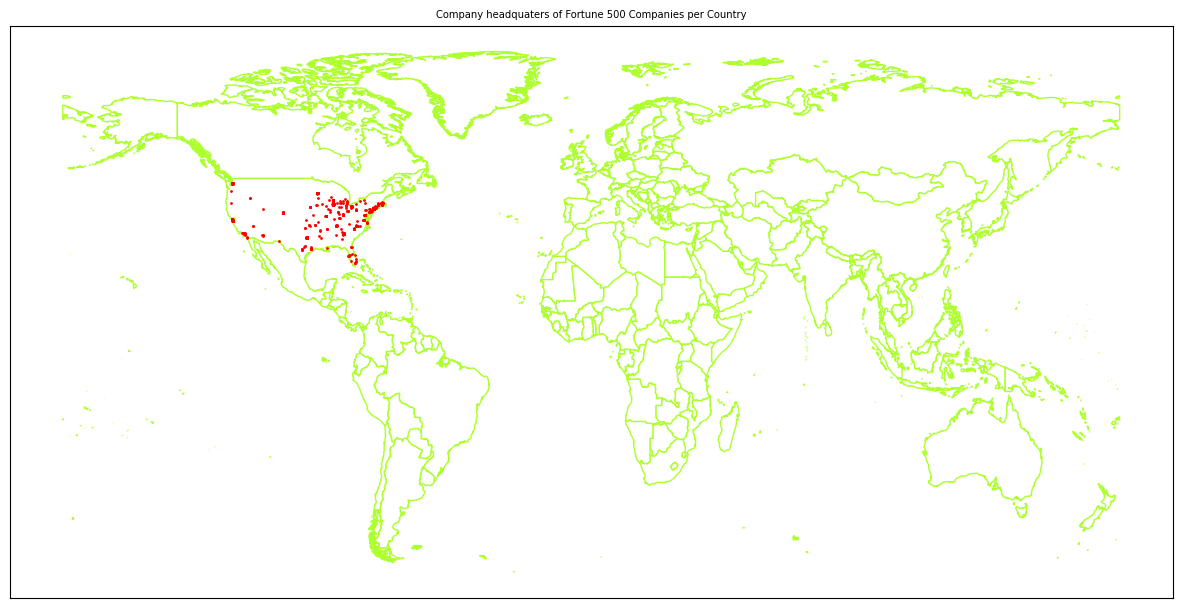

In [140]:
fig, ax = plt.subplots(1,figsize=(15,15))
world_boundaries.plot(ax=ax, color='white', edgecolor='greenyellow',linewidth=1)
Fortune_500_geo.plot(ax=ax,color='red', markersize=1)
ax.title.set_text("Company headquaters of Fortune 500 Companies per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks